## 로지스틱 회귀

- 회귀문제 = 대충 답을 때려 맞추는 것
- 선형 회귀 = 직선을 그려서 답을 맞추는 것
- 로지스틱 회귀 = 로지스틱(확률로) 회귀(대충 답을 때려 맞추는 것)

로지스틱 회귀(Logistic Regression)는 **분류(Classification)** 문제에서 많이 쓰이는 알고리즘이에요. <br>
이름은 "회귀"지만 사실상 **이진 분류(binary classification)** 혹은 **다중 분류(multi-class classification)** 에 사용됩니다.

시험을 봤는데 이 시험 점수가 **합격인지 불합격인지**가 궁금할 수도 있고, <br>
어떤 메일을 받았을 때 이게 **정상 메일인지 스팸 메일인지**를 분류하는 문제도 그렇습니다. <br>
이렇게 **둘 중 하나를 결정하는 문제**를 이진 분류(Binary Classification)라고 합니다. <br>
그리고 이런 문제를 풀기 위한 대표적인 알고리즘으로 **로지스틱 회귀(Logistic Regression)** 가 있습니다.

**로지스틱 회귀**는 **수학**을 사용하여 **두 데이터 요인 간의 관계**를 찾는 **데이터 분석 기법**입니다. <br>
그런 다음 이 관계를 사용하여 다른 요인을 기반으로 이러한 요인 중 **하나의 값을 예측**합니다. <br>
예측은 일반적으로 예 또는 아니요와 같이 유한한 수의 결과를 가집니다. <br>
예를 들어 웹 사이트 방문자가 장바구니에서 결제 버튼을 클릭할지 여부를 추측한다고 가정할 때 <br>
로지스틱 회귀 분석은 웹 사이트에서 보낸 시간 및 카트에 있는 항목 수와 같은 과거의 방문자 행동을 살펴봅니다. <br>
그런 다음 과거에 방문자가 사이트에서 5분 이상 시간을 보내고 카트에 3개 이상의 항목을 추가한 경우 결제 버튼을 클릭했다고 판단합니다. <br>
로지스틱 회귀 함수는 이 정보를 사용하여 새 웹 사이트 방문자의 행동을 예측할 수 있습니다. <br>

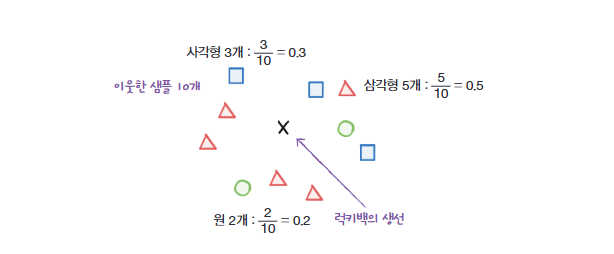

In [1]:
from IPython.display import Image, display
display(Image(filename="img/img35.png", width=800, height=600))

#### 데이터 준비

In [2]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# 크기 (159, 6)
print(fish.shape)

# 가지고 있는 고유값 추출 Species = 스피쉬즈
print(pd.unique(fish['Species']))

# ['Bream' 'Roach' 'Whitefish' 'Parkki'    'Perch'   'Pike'      'Smelt']
#   브림    로우치  화이트피시  파르키      퍼치      파이크      스멜트
# ['도미', '붕어',  '송어',  '파르키어', '농어', '강꼬치고기', '빙어']


(159, 6)
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
# 데이터 프레임에서 스피쉬즈(species) 열을 타킷으로 만들고 나머지 5개 열을 입력데티로 사용
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [5]:
fish_target = fish['Species']

## k-최근접 이웃의 다중 분류

#### 사이킷 런을 사용하여 훈련데이터와 테스트데이터 만들기 

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [7]:
### StandardScaler는 **데이터 정규화(스케일링)**를 해주는 도구
### 각 특성(feature)의 평균을 0, 표준편차를 1로 변환합니다.
### 데이터가 표준정규분포(mean=0, std=1)에 가깝게 바뀌어요.

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3) # 기본은 5
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [10]:
print(kn.classes_) #전체 클래스가 보인다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [11]:
print(kn.predict(test_scaled[:5])) # 테스트 처음 5개 예측

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [12]:
import numpy as np
# 확률 출력 : predict_proba()
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


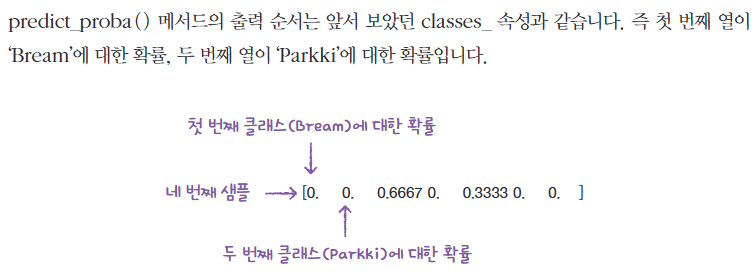

In [13]:
display(Image(filename="img/img38.png", width=800, height=600))

In [14]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target.iloc[indexes[0]])

52     Roach
106    Perch
103    Perch
Name: Species, dtype: object
